# Welcome
**This is not a one time build and publish. I intend to use this kernel as my personal workbook to answer ad-hoc questions that I have about the data.**

# Table of Contents

- [Atom Counts](#atomcounts)
- [Positions](#positions)
- [Scalar Coupling Constant](#scalarcouplingconstant)
    - [Contributions](#contrib)
- [Worrying Atom Index Funny Business](#funny)
- [Additional Data](#additional)
    - [Magnetic Shielding Tensor](#mst)
    - [Mulliken Charge](#mc)
    - [Dipole Moment](#dipole)
    - [Potential Energy](#potential)
- [Train vs. Test](#traintest)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
df_train = pd.read_csv('../input/train.csv')
df_structure = pd.read_csv('../input/structures.csv')
df_test = pd.read_csv('../input/test.csv')
df_mst = pd.read_csv('../input/magnetic_shielding_tensors.csv')
df_mc = pd.read_csv('../input/mulliken_charges.csv')
df_dp = pd.read_csv('../input/dipole_moments.csv')
df_pe = pd.read_csv('../input/potential_energy.csv')
df_contrib = pd.read_csv('../input/scalar_coupling_contributions.csv')

In [3]:
atoms = sorted(df_structure['atom'].unique())
mst_elems = sorted([c for c in df_mst.columns if c not in ['atom_index', 'molecule_name']])
dims = ['x', 'y', 'z']

# Atom Counts <a id="atomcounts"></a>

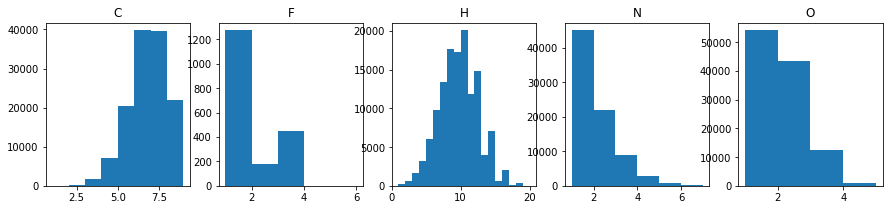

In [4]:
atom_counts = df_structure.pivot_table(index='molecule_name', columns='atom', values='atom_index', aggfunc='count', fill_value=0)

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for c, ax in zip(atom_counts.columns, axs):
    ax.hist(atom_counts[c], bins=np.arange(atom_counts[c].max()) + 1)
    ax.set_title(c)

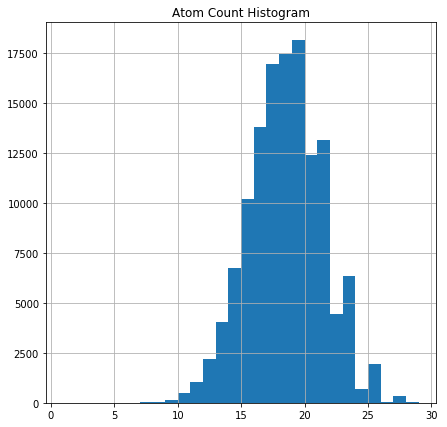

In [5]:
num_atoms = atom_counts.sum(axis=1)
plt.figure(figsize=(7,7))
num_atoms.hist(bins=np.arange(num_atoms.max()) + 1)
plt.title('Atom Count Histogram')
plt.show()

# Positions <a id="positoins"></a>

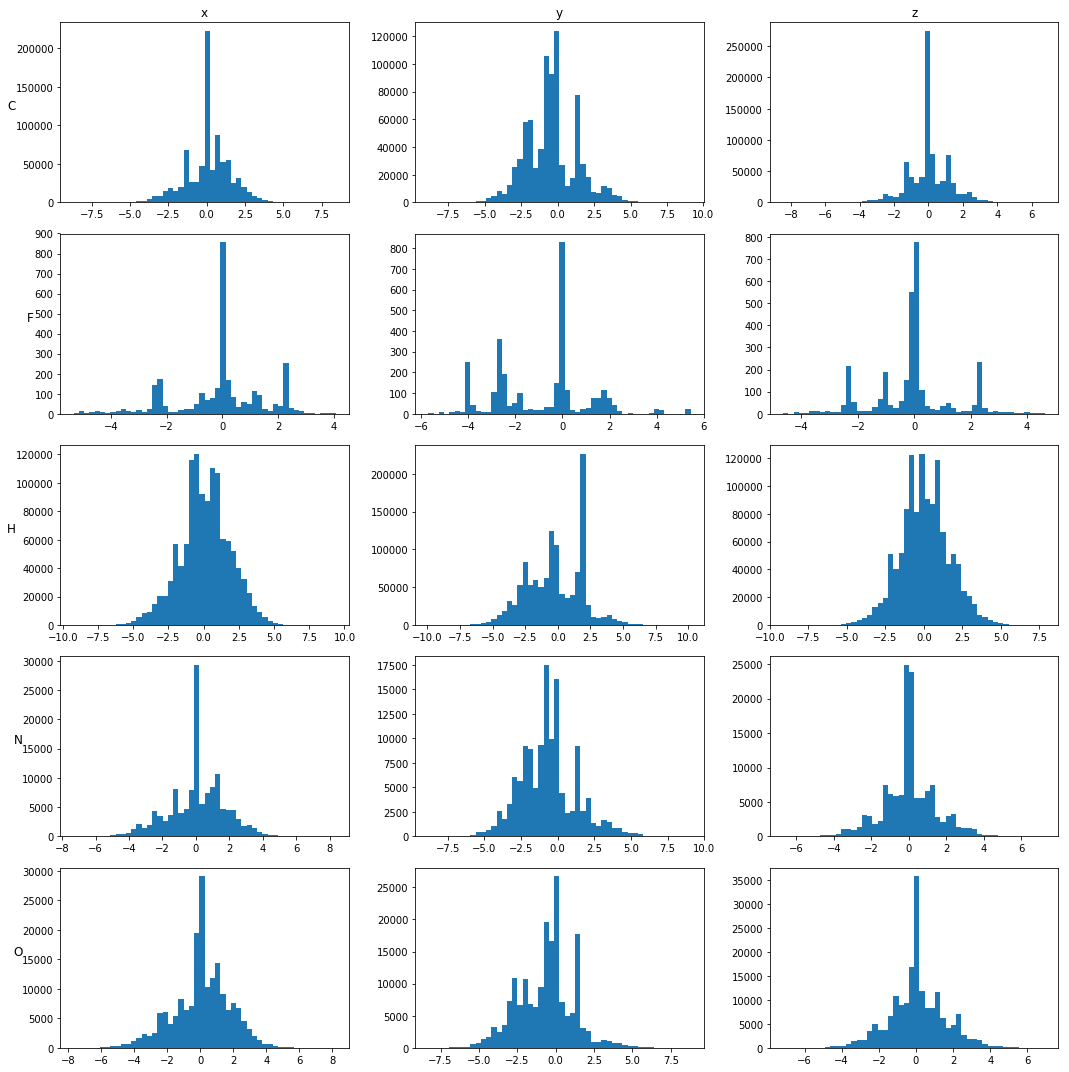

In [6]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
for i, a in enumerate(atoms):
    axs[i, 0].set_ylabel(a, rotation=0, size='large')
    df_atom = df_structure[df_structure['atom'] == a]
    for j, d in enumerate(['x', 'y', 'z']):
        axs[i, j].hist(df_atom[d], bins=50)
for j, d in enumerate(['x', 'y', 'z']):
    axs[0, j].set_title(d)
plt.tight_layout()
plt.show()

Essentially zero repetition in position values.

In [7]:
pd.concat([df_structure[d].value_counts().value_counts() for d in dims], axis=1).fillna(0).astype(int)

,x,y,z
1,2358225,2358094,2358196
2,216,269,223
6,0,0,1
9,0,0,1
25,0,1,0


# Scalar Coupling Constant <a id="scalarcouplingconstant"></a>

In [154]:
df_train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


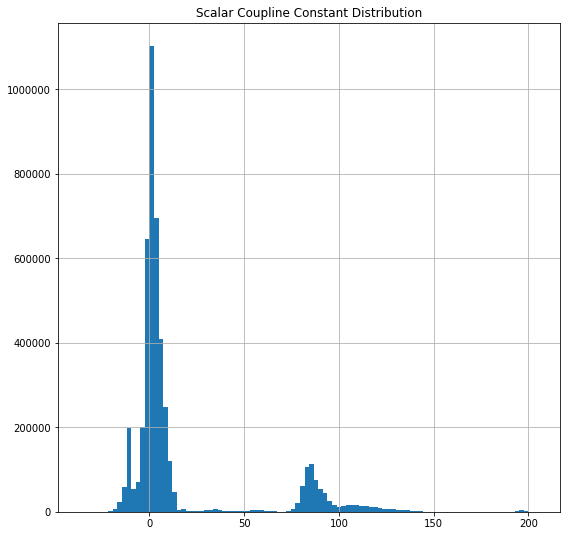

In [8]:
plt.figure(figsize=(9,9))
df_train['scalar_coupling_constant'].hist(bins=100)
plt.title('Scalar Coupline Constant Distribution')
plt.show()

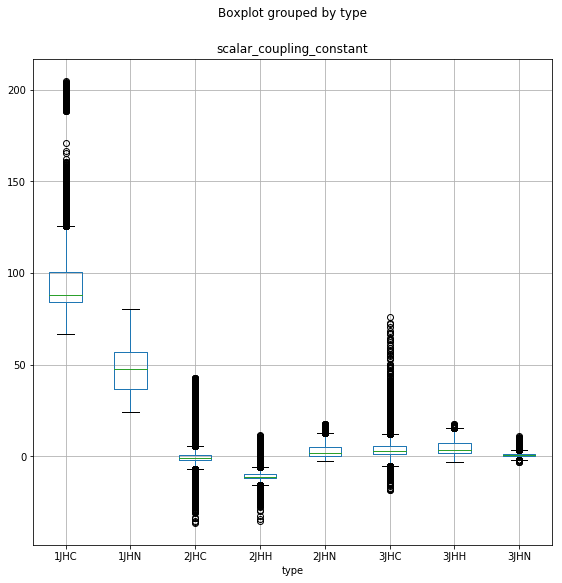

In [9]:
plt.figure(figsize=(9,9))
df_train.boxplot('scalar_coupling_constant', by='type', ax=plt.gca())
plt.show()

## Scalar Coupling Contributions <a id="contrib"></a>

In [138]:
contribs = ['fc', 'sd', 'pso', 'dso']

In [146]:
df_contrib.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


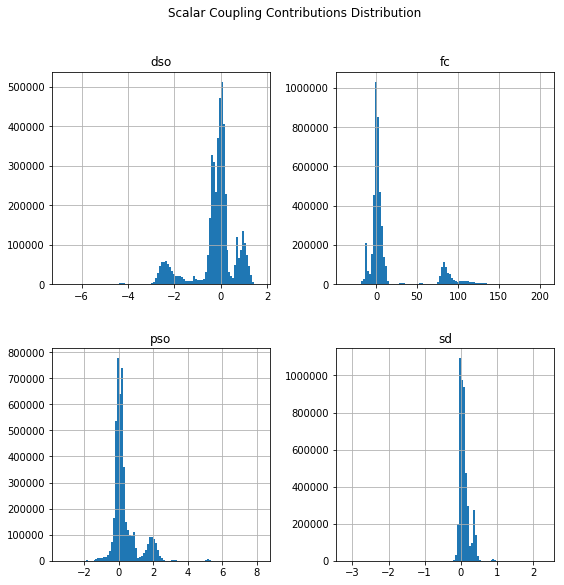

In [145]:
df_contrib[contribs].hist(bins=100, figsize=(9, 9))
plt.suptitle('Scalar Coupling Contributions Distribution')
plt.show()

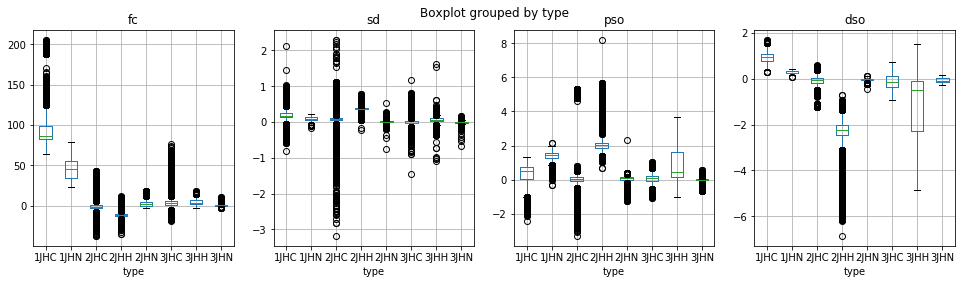

In [151]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, c in enumerate(contribs):
    df_contrib.boxplot(c, by='type', ax=axs[i])
plt.show()

# Worrying Atom Index Funny Business <a id="funny"></a>

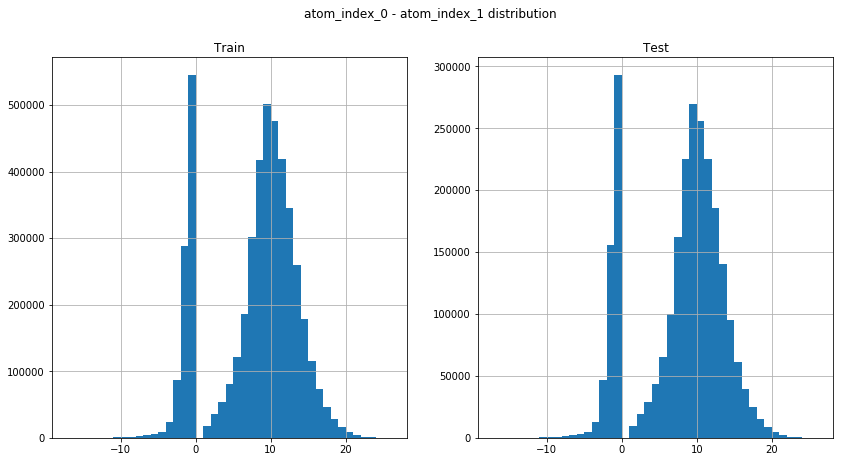

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

atom_index_dif_train = (df_train['atom_index_0'] - df_train['atom_index_1'])
atom_index_dif_train.hist(bins=np.arange(atom_index_dif_train.min(), atom_index_dif_train.max() + 1), ax=axs[0])

atom_index_dif_test = (df_test['atom_index_0'] - df_test['atom_index_1'])
atom_index_dif_test.hist(bins=np.arange(atom_index_dif_test.min(), atom_index_dif_test.max() + 1), ax=axs[1])

axs[0].set_title('Train')
axs[1].set_title('Test')
plt.suptitle('atom_index_0 - atom_index_1 distribution')

plt.show()

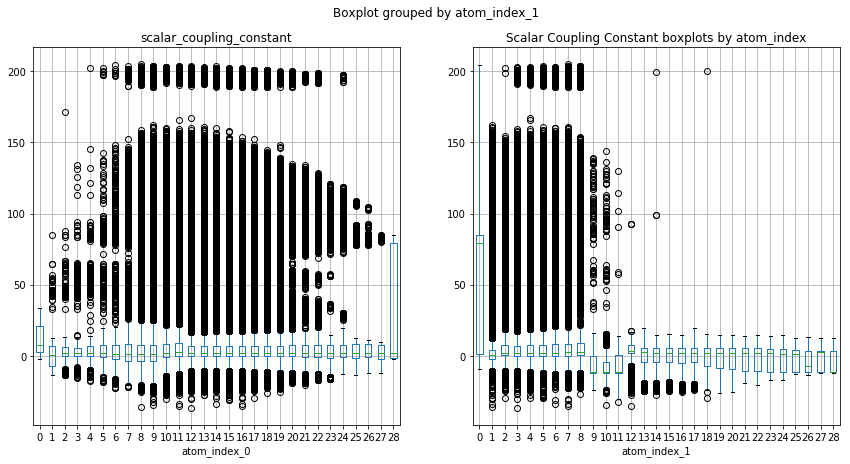

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))
df_train.boxplot('scalar_coupling_constant', by='atom_index_0', ax=axs[0])
df_train.boxplot('scalar_coupling_constant', by='atom_index_1', ax=axs[1])
plt.title('Scalar Coupling Constant boxplots by atom_index')
plt.show()

In [73]:
df_train['index_0_gt_1'] = df_train['atom_index_0'] > df_train['atom_index_1']
df_test['index_0_gt_1'] = df_test['atom_index_0'] > df_test['atom_index_1']

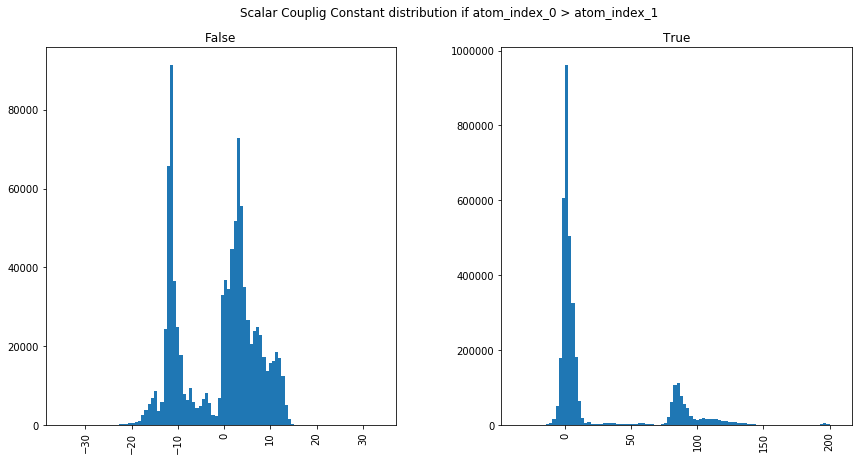

In [74]:
df_train.hist('scalar_coupling_constant', by='index_0_gt_1', figsize=(14, 7), bins=100)
plt.suptitle('Scalar Couplig Constant distribution if atom_index_0 > atom_index_1')
plt.show()

Bizzarrely the 2JHH, and 3JHH types have all been selected such that `atom_index_1` > `atom_index_0` and for *nearly* all other types it is the opposite.

In [75]:
df_train.pivot_table(index='type', columns='index_0_gt_1', aggfunc='count', values='id', fill_value=0)

index_0_gt_1,False,True
type,,
1JHC,0,709416
1JHN,1,43362
2JHC,322,1140352
2JHH,378036,0
2JHN,5,119248
3JHC,523,1509856
3JHH,590611,0
3JHN,104,166311


In [76]:
df_test.pivot_table(index='type', columns='index_0_gt_1', aggfunc='count', values='id', fill_value=0)

index_0_gt_1,False,True
type,,
1JHC,0,380609
1JHN,0,24195
2JHC,159,612979
2JHH,203126,0
2JHN,0,64424
3JHC,228,811771
3JHH,317435,0
3JHN,54,90562


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


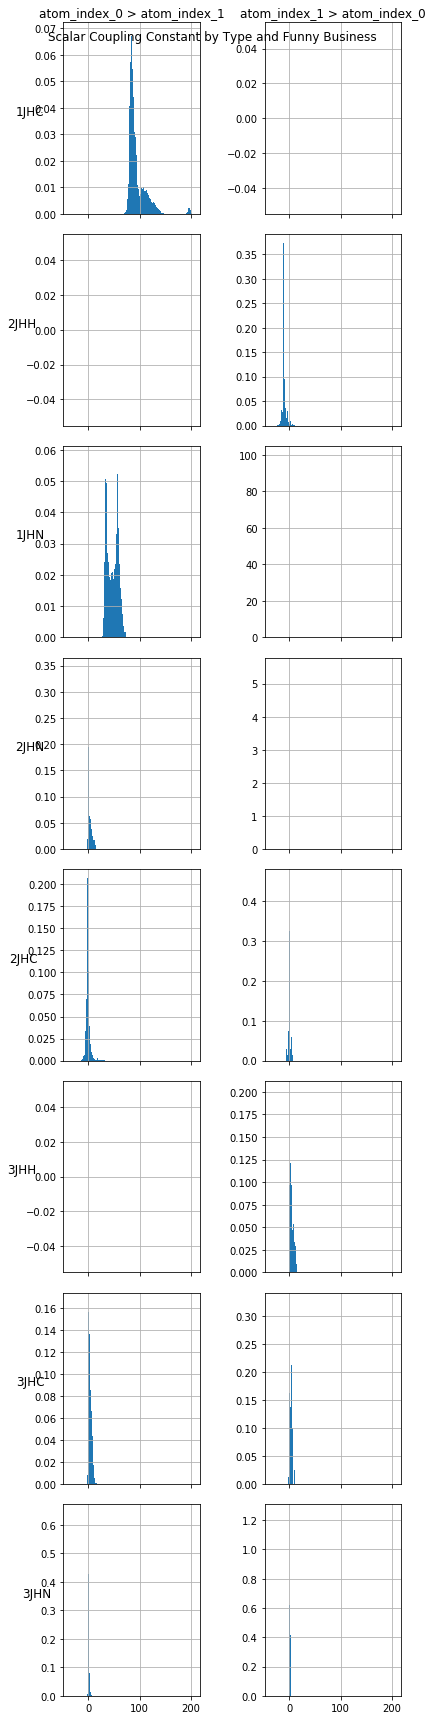

In [77]:
fig, axs = plt.subplots(8, 2, figsize=(6, 24), sharex=True)
for t_idx, t in enumerate(df_train['type'].unique()):
    axs[t_idx, 0].set_ylabel(t, rotation=0, size='large')
    for tf_idx, tf in enumerate([True, False]):
        df_train[np.logical_and(
            df_train['type'] == t,
            df_train['index_0_gt_1'] == tf)]['scalar_coupling_constant'].hist(
            bins=100, density=True, ax=axs[t_idx, tf_idx])
axs[0, 0].set_title('atom_index_0 > atom_index_1')
axs[0, 1].set_title('atom_index_1 > atom_index_0')
plt.suptitle('Scalar Coupling Constant by Type and Funny Business')
plt.tight_layout()
plt.show()

# Additional Data <a id="additional"></a>

## Magnetic Sheilding Tensor <a id="mst"></a>

In [155]:
df_mst.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


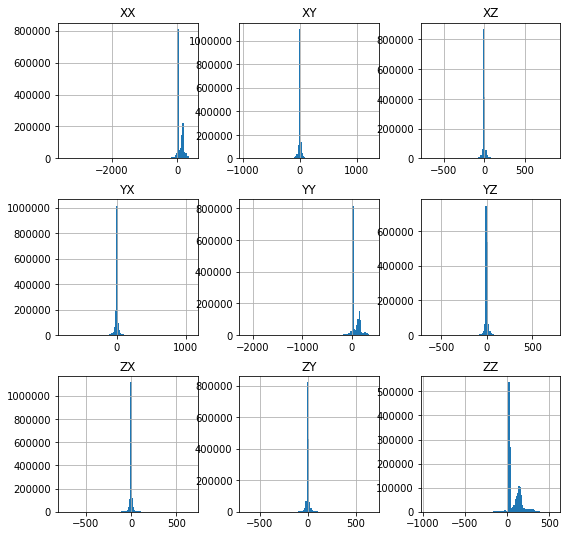

In [17]:
df_mst[mst_elems].hist(bins=100, figsize=(9, 9))
plt.show()

Values in the MST are repeated surprisingly frequently.
Below is how often a value is repeated once, twice, three times, etc. for each column.
Not that a value repeated twice gets counted only once!

A ZY value gets repeated 10,868 times? Wow.

In [71]:
mst_repeats = pd.concat([df_mst[c].value_counts().value_counts() for c in mst_elems], axis=1).fillna(0).astype(int)
mst_repeats.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1315,1328,1332,1429,1447,1463,1497,1512,1546,1577,1635,1690,1722,1759,1769,1830,1970,1991,2017,2050,2149,2255,2262,2296,2559,2609,2699,2724,2945,2993,3276,3508,3540,3544,4216,4231,6395,7825,8842,10868
XX,287035,66677,36597,26730,20931,17383,14432,11721,9912,8144,6571,5225,4022,2899,2057,1429,899,594,344,175,100,47,33,14,4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
XY,331858,86863,32870,16466,10406,8081,6977,6194,5570,5303,4916,4548,4205,3891,3490,3036,2551,2138,1891,1445,1083,822,566,383,297,188,147,85,46,26,13,13,5,8,8,4,6,7,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
XZ,269812,69520,28404,15194,10369,8464,7437,6741,6196,5383,4950,4588,4120,3562,3116,2734,2367,2007,1552,1310,1086,814,663,478,350,274,222,174,127,115,91,78,56,50,43,55,38,37,33,37,...,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
YX,333387,85510,32736,16681,11225,8730,7397,6525,5946,5559,5209,4936,4489,4011,3585,2998,2567,1997,1614,1236,866,654,441,286,203,121,85,53,38,22,13,16,7,6,3,4,2,1,1,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
YY,291003,62317,35732,29465,25035,21038,17110,13690,10806,8125,6073,4313,2974,1961,1285,767,455,243,137,64,28,17,13,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YZ,249939,63418,26097,14281,10427,9268,9000,8820,8733,8091,7069,6032,5114,4111,3234,2463,1917,1372,1020,712,546,382,289,217,175,115,97,81,66,65,42,54,33,39,31,28,25,18,19,30,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
ZX,263139,67463,27949,15940,11623,9372,8428,7325,6542,5709,4950,4389,3901,3331,2904,2555,2149,1802,1534,1325,995,827,645,426,356,272,232,187,124,101,76,68,54,52,27,55,34,27,39,37,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
ZY,242559,61678,25904,14984,10942,9670,9487,9317,8732,7886,6976,6055,4925,4063,2999,2370,1869,1329,1034,785,554,411,292,255,169,135,105,80,59,46,41,48,38,34,37,33,23,19,18,17,...,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
ZZ,228118,64328,37774,31848,29022,25278,21343,16506,12261,8604,5494,3415,1987,1087,600,312,156,76,30,14,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Mulliken Charge <a id="mc"></a>

In [156]:
df_mc.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


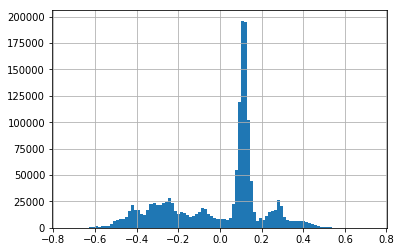

In [19]:
plt.figure()
df_mc['mulliken_charge'].hist(bins=100)

In [20]:
atom_mc = df_mc.merge(df_structure, how='left', on=['molecule_name', 'atom_index'])

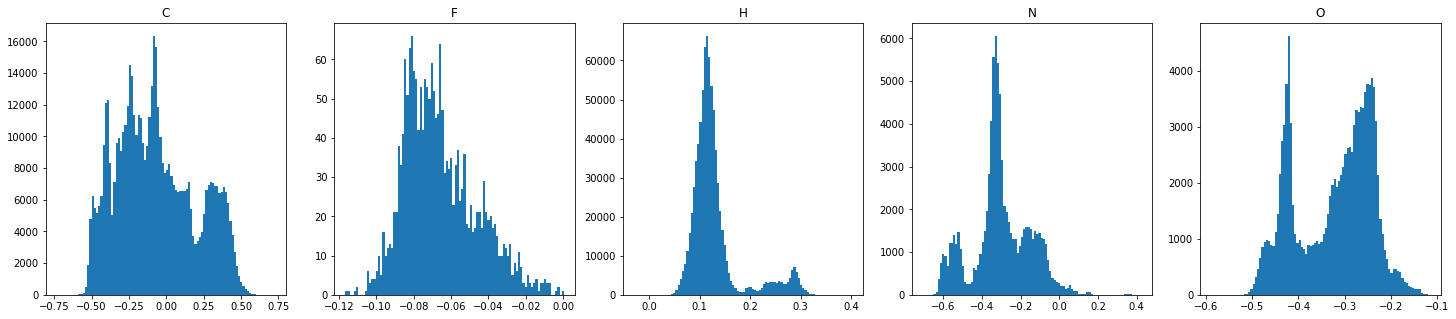

In [21]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for c, ax in zip(atom_counts.columns, axs):
    df_atom = atom_mc[atom_mc['atom'] == c]
    ax.hist(df_atom['mulliken_charge'], bins=100)
    ax.set_title(c)

Lots of exactly repeated values in here for muliken_charge as well!

In [70]:
mc_repeats = atom_mc['mulliken_charge'].value_counts().value_counts()
pd.DataFrame(mc_repeats).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,33,31,39
mulliken_charge,310494,140878,57073,23500,11308,7362,5911,5392,5093,4889,4550,4173,3619,3334,2785,2350,1759,1446,1005,754,535,366,226,145,72,60,25,15,7,2,1,1,1


## Dipole Moments <a id="dipole"></a>

In [157]:
df_dp.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


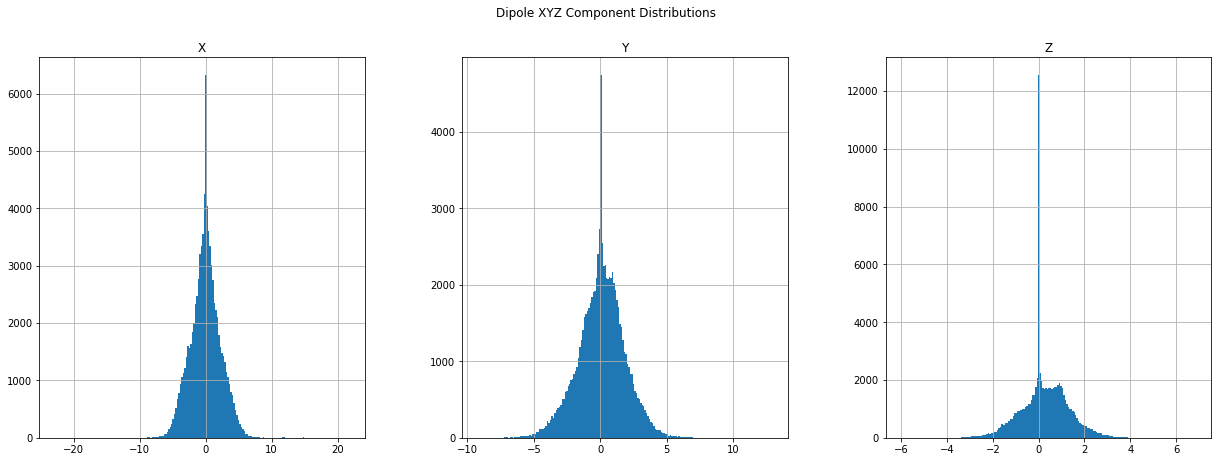

In [43]:
df_dp[['X', 'Y', 'Z']].hist(bins=200, figsize=(21, 7), layout=(1,3))
plt.suptitle('Dipole XYZ Component Distributions')
plt.show()

In [47]:
pd.DataFrame((df_dp[['X', 'Y', 'Z']] == 0.0).sum(axis=1).value_counts(), columns=['Zero Components'])

,Zero Components
0,81182
1,3519
2,274
3,28


Components scattered. No correlation. We can see that X is oddly narrower, they all have strange zero bands ,and Z in particular.

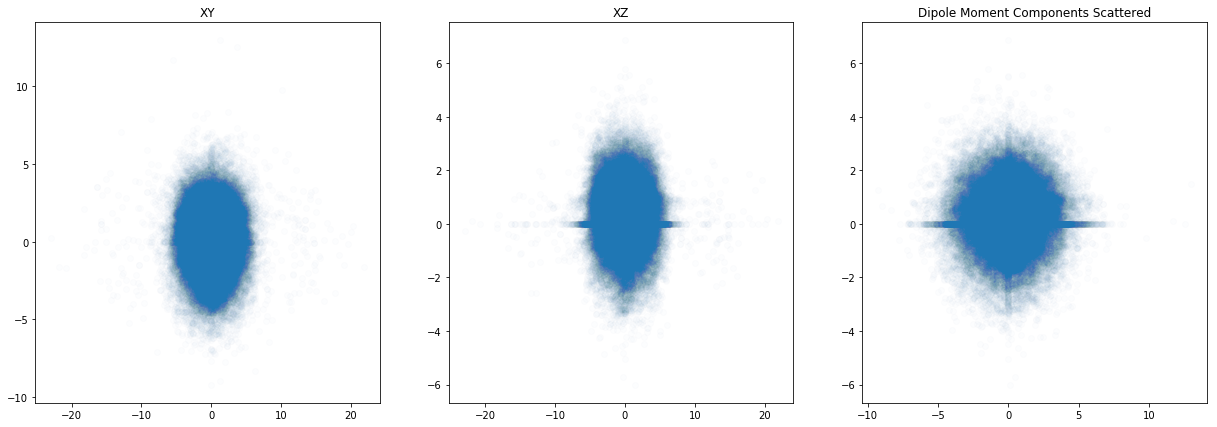

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
axs[0].scatter(df_dp['X'], df_dp['Y'], alpha=0.01)
axs[1].scatter(df_dp['X'], df_dp['Z'], alpha=0.01)
axs[2].scatter(df_dp['Y'], df_dp['Z'], alpha=0.01)
axs[0].set_title('XY')
axs[1].set_title('XZ')
axs[2].set_title('YZ')
plt.title('Dipole Moment Components Scattered')
plt.show()

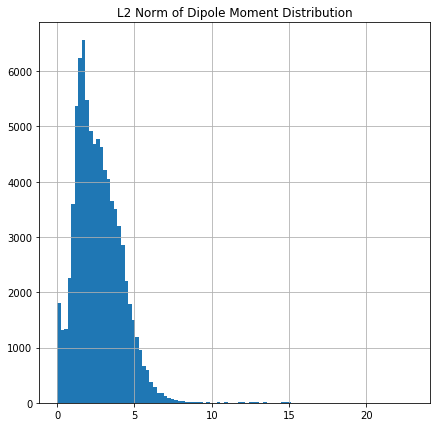

In [51]:
df_dp[['X', 'Y', 'Z']].apply(np.linalg.norm, axis='columns').hist(bins=100, figsize=(7,7))
plt.title('L2 Norm of Dipole Moment Distribution')
plt.show()

Repetition in values of the XYZ components. Why?!

In [62]:
pd.concat([df_dp[d].value_counts().value_counts() for d in ['X', 'Y', 'Z']], axis=1).fillna(0).astype(int).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,31,33,34,35,39,40,41,45,47,48,54,55,57,59,60,61,62,64,66,69,75,81,92,98,118,119,120,132,137,147,163,206,216,270,285,338,406,414,560,604,730,1013,1031,2560
X,31840,13185,4969,1718,540,163,47,17,3,1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Y,25241,12186,5760,2330,853,294,95,33,12,2,1,1,1,0,2,1,0,1,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Z,15114,8878,5259,2993,1442,666,254,85,52,9,10,7,5,2,8,3,3,0,2,1,2,1,2,2,2,2,1,1,2,0,1,2,1,0,2,1,1,1,1,0,0,0,1,1,2,0,1,1,2,1,1,1,1,2,0,1,0,2,1,1,1,1,1,1,1,1,0,1,1,1,0,1


## Potential Energy <a id="potential"></a>

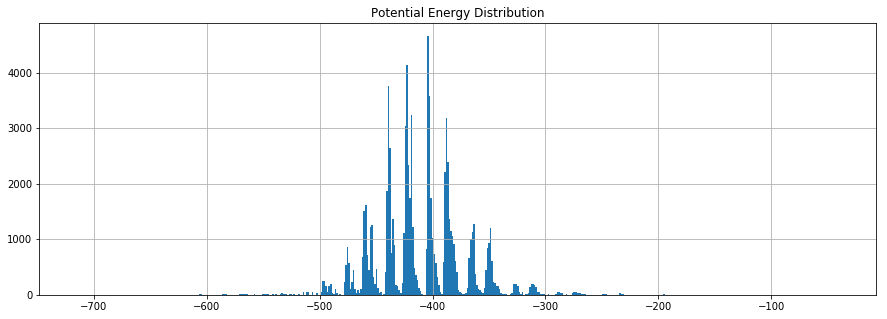

In [84]:
df_pe['potential_energy'].hist(bins=500, figsize=(15,5))
plt.title('Potential Energy Distribution')
plt.show()

Some repetitoin of values in the potential energy data

In [158]:
pd.DataFrame(df_pe['potential_energy'].value_counts().value_counts()).T

,1,2,3,4,5,6,7,8,9,10,11,12,14,13
potential_energy,37864,9536,3819,1725,865,430,189,98,36,14,12,4,2,2


# Train vs Test <a id="traintest"></a>

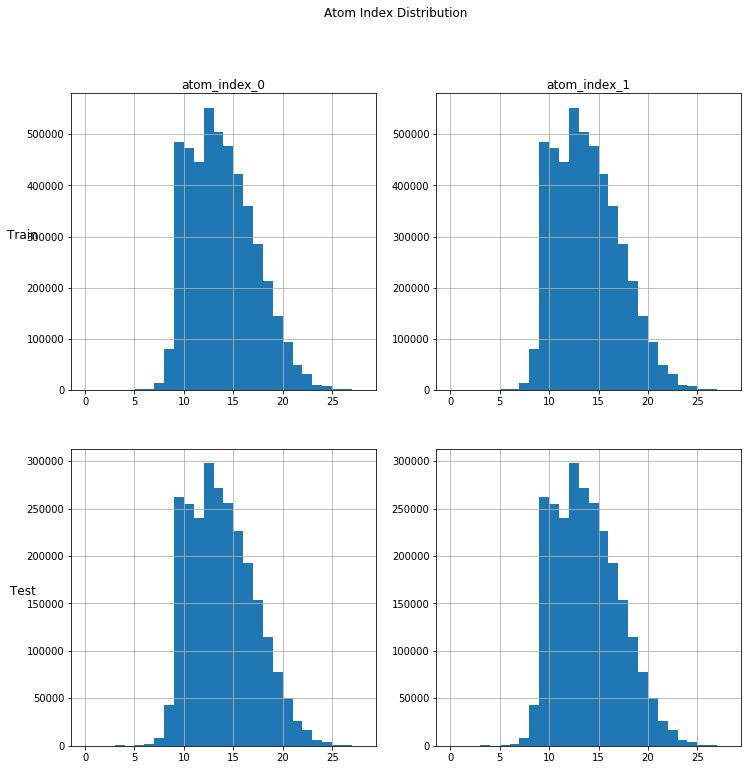

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
df_train['atom_index_0'].hist(bins=np.arange(df_train['atom_index_0'].max()+1), ax=axs[0, 0])
df_train['atom_index_0'].hist(bins=np.arange(df_train['atom_index_1'].max()+1), ax=axs[0, 1])
df_test['atom_index_0'].hist(bins=np.arange(df_test['atom_index_0'].max()+1), ax=axs[1, 0])
df_test['atom_index_0'].hist(bins=np.arange(df_test['atom_index_1'].max()+1), ax=axs[1, 1])
axs[0, 0].set_ylabel('Train', rotation=0, size='large')
axs[1, 0].set_ylabel('Test', rotation=0, size='large')
axs[0, 0].set_title('atom_index_0')
axs[0, 1].set_title('atom_index_1')
plt.suptitle('Atom Index Distribution')
plt.show()

In [24]:
num_atoms_test = df_test.merge(pd.DataFrame(num_atoms, columns=['num_atoms']), on='molecule_name', how='left')
num_atoms_train = df_train.merge(pd.DataFrame(num_atoms, columns=['num_atoms']), on='molecule_name', how='left')

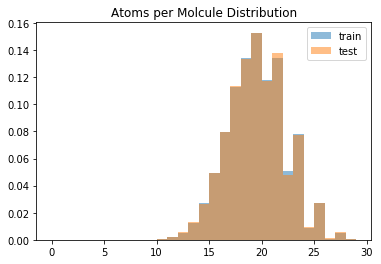

In [25]:
plt.figure()
plt.hist(num_atoms_train['num_atoms'], bins=np.arange(30), label='train', density=True, alpha=0.5)
plt.hist(num_atoms_test['num_atoms'], bins=np.arange(30), label='test', density=True, alpha=0.5)
plt.legend()
plt.title('Atoms per Molcule Distribution')
plt.show()

In [26]:
type_distribution = pd.concat([
    df_train['type'].value_counts() / len(df_train),
    df_test['type'].value_counts() / len(df_test)
], axis=1)
type_distribution.columns = ['train_type_distribution', 'test_type_distribution']
type_distribution

,train_type_distribution,test_type_distribution
3JHC,0.324245,0.324081
2JHC,0.244877,0.244713
1JHC,0.152296,0.151907
3JHH,0.126791,0.126693
2JHH,0.081156,0.081071
3JHN,0.035726,0.036166
2JHN,0.025601,0.025713
1JHN,0.009309,0.009657


In [27]:
print('{} rows per molecule in train.'.format(len(df_train) / len(df_train['molecule_name'].unique())))
print('{} rows per molecule in test.'.format(len(df_test) / len(df_test['molecule_name'].unique())))

54.79979530134231 rows per molecule in train.
54.73962247662326 rows per molecule in test.


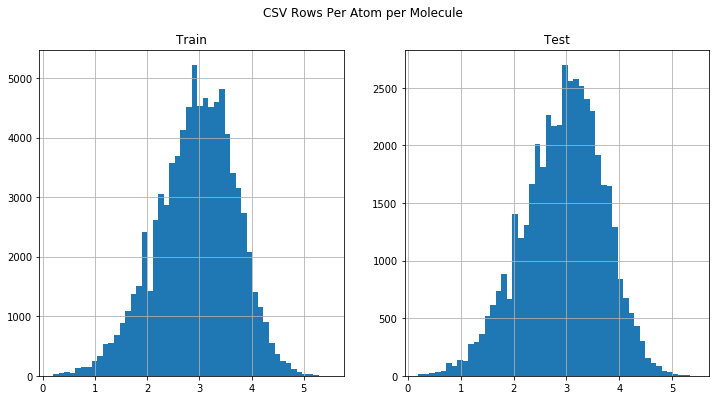

In [28]:
num_values_train = df_train.groupby('molecule_name')['atom_index_0'].apply(len)
df_atoms_values_train = pd.DataFrame(num_values_train)
df_atoms_values_train = df_atoms_values_train.merge(pd.DataFrame(num_atoms), left_index=True, right_index=True)
df_atoms_values_train.columns = ['num_values', 'num_atoms']

num_values_test = df_test.groupby('molecule_name')['atom_index_0'].apply(len)
df_atoms_values_test = pd.DataFrame(num_values_test)
df_atoms_values_test = df_atoms_values_test.merge(pd.DataFrame(num_atoms), left_index=True, right_index=True)
df_atoms_values_test.columns = ['num_values', 'num_atoms']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
(df_atoms_values_train['num_values'] / df_atoms_values_train['num_atoms']).hist(bins=50, ax=axs[0])
(df_atoms_values_test['num_values'] / df_atoms_values_test['num_atoms']).hist(bins=50, ax=axs[1])
axs[0].set_title('Train')
axs[1].set_title('Test')
plt.suptitle('CSV Rows Per Atom per Molecule')
plt.show()